# [TalkingData AdTracking Fraud Detection Challenge - Kaggle](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection)

* ip: ip address of click.
* app: app id for marketing.
* device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
* os: os version id of user mobile phone
* channel: channel id of mobile ad publisher
* click_time: timestamp of click (UTC)
* attributed_time: if user download the app for after clicking an ad, this is the time of the app download
* is_attributed: the target that is to be predicted, indicating the app was downloaded

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
sample = pd.read_csv('data/train_sample.csv', parse_dates=['click_time'])
sample.shape

(100000, 8)

In [3]:
sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


In [5]:
sample.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [6]:
sample.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [7]:
sample["year"] = sample["click_time"].dt.year
sample["month"] = sample["click_time"].dt.month
sample["day"] = sample["click_time"].dt.day
sample["hour"] = sample["click_time"].dt.hour
sample["minute"] = sample["click_time"].dt.minute
sample["second"] = sample["click_time"].dt.second

In [8]:
sample.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

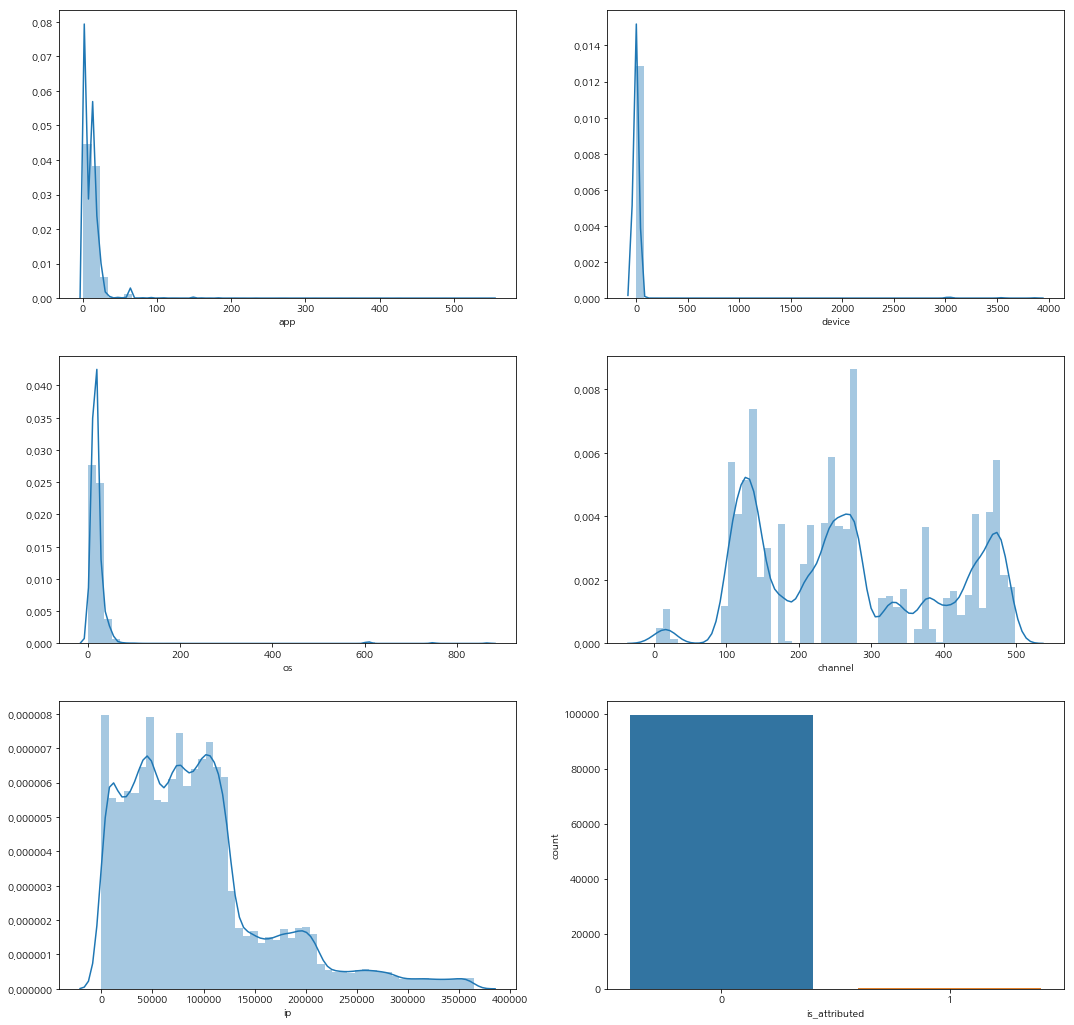

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(18,18)

sns.distplot(sample['app'], ax=axes[0][0])
sns.distplot(sample['device'], ax=axes[0][1])
sns.distplot(sample['os'], ax=axes[1][0])
sns.distplot(sample['channel'], ax=axes[1][1])
sns.distplot(sample['ip'], ax=axes[2][0])
sns.countplot(sample['is_attributed'], ax=axes[2][1])

In [10]:
# 1, 2, 0번 순으로 디바이스가 많다.
# 이 데이터에는 100개의 디바이스가 있다.
device = sample.device.value_counts()
print(device.shape)
device.head(10)

(100,)


1       94338
2        4345
0         541
3032      371
3543      151
3866       93
59         12
6           8
16          7
5           7
Name: device, dtype: int64